# <center> __Predicting Lung Cancer Severity__ </center>
### <center> __Spring 2024 Data Science Project__ </center>
#### <center> __Akash Shah and Shasank Patel__ </center>

### Contribution Checkpoint
- Member 1: Akash Shah, Contribution: 100%
- Member 2: Shasank Patel, Contrubution: 100%

We, all team members, agree together that the above infromation is true, and we are confident abnout our contributions to this submitted project/final tutorial
Akash Shah and Shasank Patel, 05/06/2024

#### Contribution Summary
- Akash Shah
    - I assisted my group in coming up with an idea and working on the code for the project. My team and I met together and worked on processing the data, creating statistical methods, and building machine learning models. Overall, the both of us worked and reviewed the project together.
- Shasank Patel
    - I assisted my group in coming up with an idea and working on the code for the project. My team and I met together and worked on processing the data, creating statistical methods, and building machine learning models. Overall, the both of us worked and reviewed the project together.

### __Introduction__

Ever since vaping and smoking worked its way down generations, there are more children and young adults engaged in vaping. Students in middle school and high school have started to vape which could lead to lung cancer. Understanding the severity of lung cancer is important in the current day and age as the number has more than doubled. There have been several attempts to prevent kids from using tobaco and e-cigarette products. However, since this is still an issue, it is necessary to spread information regarding how different factors can lead to lung cancer, and what symptoms could be seen from patients.

The purpose of this project is to help people learn what can lead to different levels of lung cancer and make an assumption on the severity of one's lung cancer. We wanted to see how lung cancer reacts to different elements, and come up with a way to predict the severity levels. It is assumed that smoking leads to lung issues, but we want to dive even deeper and find out what else can cause lung cancer. The primary question we want to answer is how severe is someone's cancer depending on their health and habits. 

These questions must be answered to decrease the number of children getting lung cancer and using tabaco or e-cigarette products.

### __Data Curation__

In the current stage of the project, we had to find a dataset to use which included different levels of lung cancer. We went on Kaggle and found a dataset thata included multiple features: [Lung Cancer Prediction](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data). The next step is to download the csv file from Kaggle and save it to a folder or repository. 

For the development of the project, we will be using Python and Jupyter Notebook. Python has multiple libraries which work well for data science and machine learning. In order to start, we must import the libraries we will be using in the tutorial.

__Import Statements__

In [152]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

From the multiple libraries we imported, the most important library is [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html). Pandas allows us to manipulate the data from the csv file and manage the data in a dataframe. A dataframe is a data structure similar to a database or spreadsheet which is constructed with rows and columns. The other libraries we use are

For Visulation: [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html), [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

For Machine Learning: [Numpy](https://numpy.org/doc/stable/user/quickstart.html), [Sklearn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

In [86]:
# create dataframe from csv file
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


We have now added the csv file into a dataframe named df. df will now allow us to manage and manipulate the data to process the data. We can inspect the data type of each column and also see how many null values there are. A null value is an empty cell that holds no data.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

### __Exploratory Data Analysis__

For the next section, we can start managing the data to make it more understandable and explore the data better. There will be three sections: Data Preprocessing, Data Exploration, and Summary Statistics.

#### __Data Preprocessing__

If we want organize the data based on the patient ids, we can use the following script to reorder the dataframe based on the patient ids.

In [88]:
# change 1s and 2s to male and female
df['Gender'] = df['Gender'].apply(lambda x: 'male' if x == 1 else 'female')

# order the dataframe by patient ids
df['Patient Id'] = df['Patient Id'].apply(lambda x: int(x[1:]))
df = df.sort_values(by=['Patient Id'], ascending=True)
df['Patient Id'] = df['Patient Id'].apply(lambda x: f'P{x}')

# fix index values
df.reset_index(drop=True, inplace=True)
df['index'] = df.index
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,male,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P2,25,female,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
2,2,P3,35,male,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
3,3,P4,27,male,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
4,4,P5,48,male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P996,37,female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
996,996,P997,25,female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
997,997,P998,18,female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
998,998,P999,47,male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In order to make all of the column names match cases, we can make all of the column names lowercase and also rename certain coloumns to make them more understandable.

In [89]:
# make column names lowercase
df.rename(columns=str.lower, inplace=True)

# replaces all spaces with _
# df.rename(columns={c: c.replace(' ', '_') for c in df.columns}, inplace=True)

# rename level column 
df.rename(columns={'level': 'severity of cancer'}, inplace=True)

# rename second_hand_smoke column
df.rename(columns={'passive smoker': 'second hand smoking'}, inplace=True)

df

,index,patient id,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,...,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring,severity of cancer
0,0,P1,33,male,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P2,25,female,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
2,2,P3,35,male,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
3,3,P4,27,male,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium
4,4,P5,48,male,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P996,37,female,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
996,996,P997,25,female,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
997,997,P998,18,female,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
998,998,P999,47,male,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


#### __Data Exploration__

In this section, we will start conducting statiscal tests to learn more about the correlation between the different features. The goal is to find out how certain features impact the severity of lung cancer.

Chi-Square Test for Smoking and Severity of Cancer

Ho: Smoking does not have an effect on the severity of cancer
Ha: Smoking does have an effect on the severity of cancer

In [90]:
ct = pd.crosstab(df['smoking'], df['severity of cancer'])
ct

severity of cancer,High,Low,Medium
smoking,,,
1,0,61,120
2,70,81,71
3,0,71,101
4,19,40,0
5,0,0,10
6,10,30,20
7,187,20,0
8,79,0,10


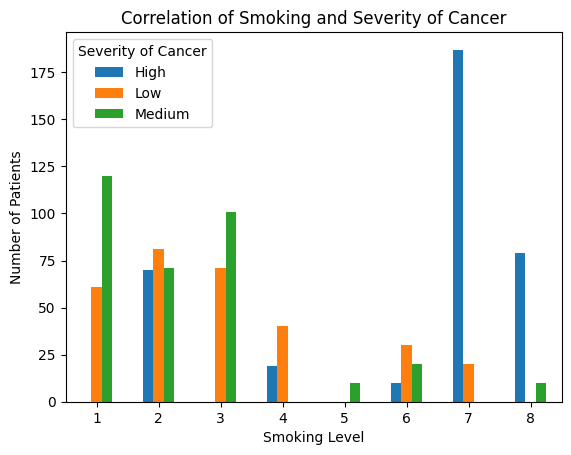

In [91]:
ct.plot(kind='bar')
plt.xlabel("Smoking Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Smoking and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

In [92]:
tstat, pval, dof, efreq = stats.chi2_contingency(ct)
print(pval)

5.246169667913276e-137


With a p-value of 5.25e-137, we can reject the null hypothesis since the p-value is less than alpha, 0.05. Since the p-value is very small, we can say that there is a strong relationship between smoking and lung cancer. However, conducting the test solely on the smokoing column does not account for other factors. 

To isolate smoking, we can use the patients who are in places with good air pollution, low occupational hazards, and low genetic risk. We can limit these variables since they do not affect smoking directly such as the other factors. For example, smoking is a cause of chronic lung disease which causes other symptoms in the dataframe. Accounting for these three factors allows us to isolate smoking against cancer since many of the other columns include the effects of smoking.

In [93]:
ct1 = pd.crosstab(df[(df['air pollution'].isin([1, 2, 3, 4, 5])) &
                     (df['occupational hazards'].isin([1, 2, 3, 4, 5])) &
                     (df['genetic risk'].isin([1, 2, 3, 4]))
                     ]['smoking'], df['severity of cancer'])
ct1
# isolate smoking by by accounting for air pollution, alcohol use, occupational hazard, genetic risk, chronic lung disease, passive smoker?, and symptoms?

severity of cancer,Low,Medium
smoking,,
1,61,50
2,81,71
3,71,71
4,20,0
6,20,0
7,20,0


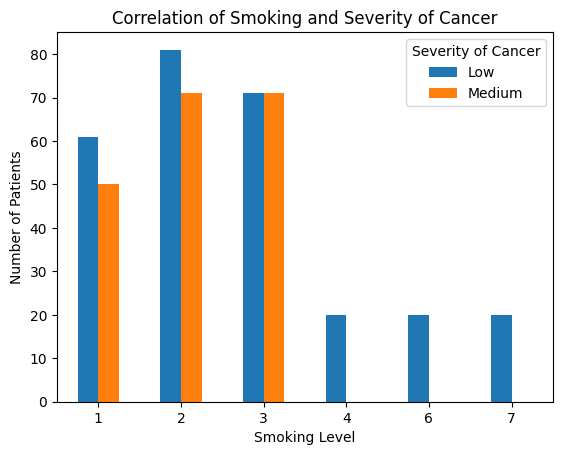

In [94]:
ct1.plot(kind='bar')
plt.xlabel("Smoking Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Smoking and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

In [95]:
tstat, pval, dof, efreq = stats.chi2_contingency(ct1)
print(pval)

2.0884732820904753e-09


With a p-value of 0.00000000209, we can reject the null hypothesis since the p-value is much smaller than the significance level of 0.05. With the p-value being very small, we can state that smoking has a strong relationship with lung cancer, as even though many of the patients have low and medium severities of cancer, the patients in this test are controlled by other factors.

Heat Maps with Pearson's Correlation Coefficient for Causes and Symptoms of Chronic Lung Disease

Based on scholarly articles, smoking, air_pollution, and genetic risk are causes of chronic lung disease. Occupational hazards and passive smoking fit in this category as well since the three factors mentioned also affect occupations and passive smoking. Similarly, symptoms such as chest pain, coughing, fatigue, shortness of breath, unintended weight loss, and wheezing are known to be correlated with chronic long disease.

With this, we can produce a correlation chart to identify whether or not chronic lung disease has a strong relationship with the causes and symptoms mentioned.

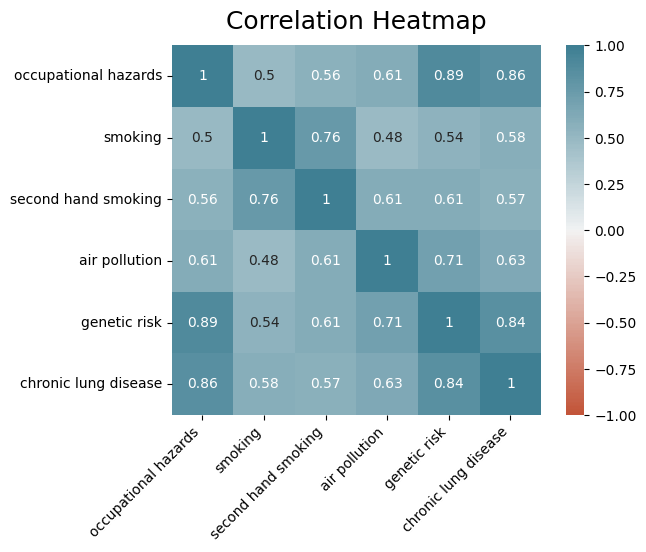

In [96]:
df2 = df[['occupational hazards', 'smoking', 'second hand smoking', 'air pollution', 'genetic risk', 'chronic lung disease']].copy()
corr = df2.corr()
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    square=True
)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


# plt.figure(figsize=(8,8))
# sns.heatmap(df2.corr(),annot=True,fmt=".00")
# plt.yticks(rotation=0)
# plt.show()

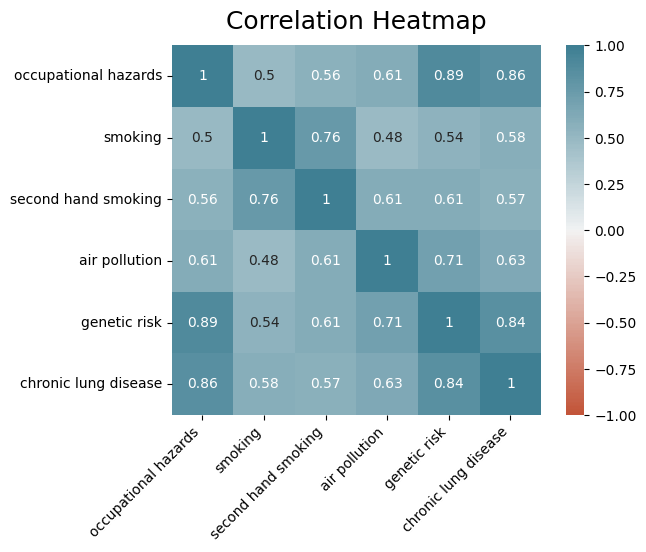

In [97]:
df3 = df[['chest pain', 'coughing of blood', 'fatigue', 'weight loss', 'shortness of breath', 'wheezing', 'dry cough', 'chronic lung disease']].copy()
corr2 = df3.corr()
ax2 = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,
    square=True
)

ax2.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

ax2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# plt.figure(figsize=(8,8))
# sns.heatmap(df3.corr(),annot=True,fmt=".00")
# plt.yticks(rotation=0)
# plt.show()

Based on the heat maps, we can see that there is a strong relationship between occupational hazards, smoking, passive smoking, air pollution, genetic risk, and chronic lung disease. Therefore, we can conclude that all of the causes are in direct correlation to chronic lung disease. According to the second heat map, we can see that chest pain and coughing of blood have strong relationships with chronic lung disease. Though the other symptoms do not show a strong relationship, it does not necessarily mean that a patient with chronic lung disease will not present these symptoms. We can use these findings to further look into the correlation between lung cancer and chronic lung disease.

ANOVA Test for Severity of Cancer and Chronic Lung Disease

H0: The severity of cancer does not have a correlation with chronic lung disease.

HA: The severity of cancer does have a correlation with chronic lung disease.

We can run an ANOVA test since there are three groups of severity of cancer.

In [98]:
ct3 = pd.crosstab(df['chronic lung disease'], df['severity of cancer'])
ct3

high = []
medium = []
low = []

for i, j in df.iterrows():

  if j['severity of cancer'] == 'High':
    high.append(j['chronic lung disease'])
  elif j['severity of cancer'] == 'Medium':
    medium.append(j['chronic lung disease'])
  else:
    low.append(j['chronic lung disease'])

stat, pval = stats.f_oneway(high, medium, low)
pval

4.939473195845556e-107

We ran an anova test on the the high, medium, and low groups for the correlation between severity of cancer and chronic lung disease. The p-value is much lower than the standard alpha of 0.05. So we reject the null hypothesis and this shows that there is a high correlation between chronic lung disease and severity of cancer groups. 

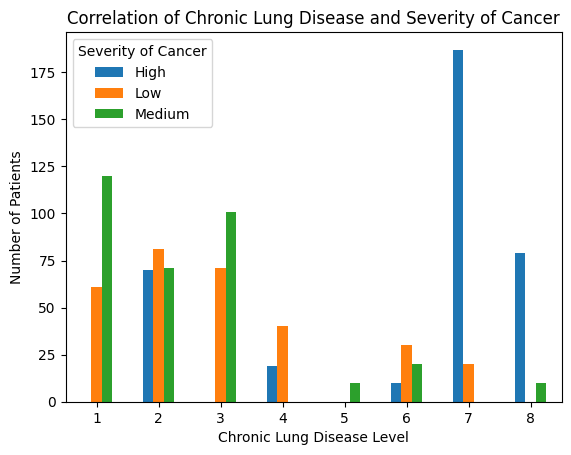

In [99]:
ct.plot(kind='bar')
plt.xlabel("Chronic Lung Disease Level")
plt.ylabel("Number of Patients")
plt.title("Correlation of Chronic Lung Disease and Severity of Cancer")

plt.legend(title="Severity of Cancer")
plt.xticks(rotation=0)
plt.show()

#### __Summary Statistics__

Based on the three statistical methods, we found that the chi-square test was the most useful as everything is categorical data. Smoking and chronic lung disease were the most impactful on the severity of cancer. Those were also our key factors in the dataframe.

### __Primary Analysis__

Now that we know what the data looks like, let's see how we can use it to create a
machine learning model to predict whether someone has lung cancer or not.
First we trimmed the number of columns down to the ones we really care about.
This allows us to simplify the data by reducing the dimension of the dataset.
This will also let us make simplier models for prediction.
We will also turn all the data into numerical so it is better suited for machine
learning. We will do this by converting the male and female labels in the gender column to
0 and 1 respectively. Then for the severity of cancer column we will turn 'Low', 'Medium', and 'High, to 1, 2, and 3.

In [123]:
ml_df = df.drop(df.columns[[0, 1, 5, 6, 10, 11, 21, 22, 24]], axis=1).copy()

ml_df['gender'].astype(str)
ml_df['severity of cancer'].astype(str)
ml_df['gender'] = ml_df['gender'].apply(lambda x: 0 if x == 'male' else 1)
ml_df['severity of cancer'] = ml_df['severity of cancer'].apply(
    lambda x: 1 if x == 'Low' else (2 if x == 'Medium' else 3))

ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    1000 non-null   int64
 1   gender                 1000 non-null   int64
 2   air pollution          1000 non-null   int64
 3   occupational hazards   1000 non-null   int64
 4   genetic risk           1000 non-null   int64
 5   chronic lung disease   1000 non-null   int64
 6   smoking                1000 non-null   int64
 7   second hand smoking    1000 non-null   int64
 8   chest pain             1000 non-null   int64
 9   coughing of blood      1000 non-null   int64
 10  fatigue                1000 non-null   int64
 11  weight loss            1000 non-null   int64
 12  shortness of breath    1000 non-null   int64
 13  wheezing               1000 non-null   int64
 14  swallowing difficulty  1000 non-null   int64
 15  dry cough              1000 non-null   

Let's visualize the data we have now to look at the distributions for the machine learning model. The following histograms will give us an idea of how each feature is distributed among the patients, and give an idea of how they could relate to one another.

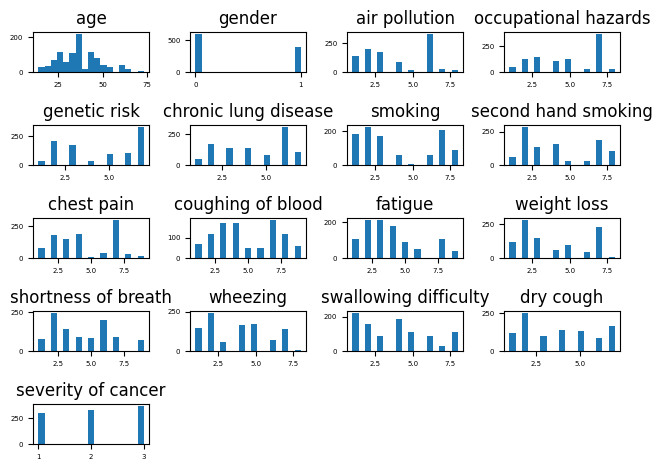

In [124]:
ml_df.hist(bins=17, xlabelsize=5, ylabelsize=5, grid=False)
plt.tight_layout(rect=(0, 0, 1, 1))

We can see that all the columns within this dataset mostly fall into two categories.

Causes: air pollution, occupational hazards, genetic risk, chronic lung disease, smoking, and second hand smoking

Symptoms: chest pain, coughing of blood, fatigue, weight loss, shortness of breath, wheezing, swallowing difficulty, and dry cough

Age and gender stay within both as we can use it for analysis later on.

In order to start building the models, we must first split the data into three arrays: causes, symptoms, and target. The causes and symptoms array will be our features and would correlate to X, and the target will be our Y which holds the severity of cancer column since that is the variable we want to predict. When it comes to selecting the features and targets, some things to consider are what we want to predict, what features are important, and what data we need.

In [125]:
X_causes = np.array(ml_df.drop(ml_df.columns[[8, 9, 10, 11, 12, 13, 14, 15, 16]], axis=1))
X_symptoms = np.array(ml_df.drop(ml_df.columns[[2, 3, 4, 5, 6, 7, 16]], axis=1))
y = np.array(ml_df['severity of cancer'])
seed = 1

Now, we [split](https://builtin.com/data-science/train-test-split) our training and testing data. We chose 50% as our test_size as the models tend to overfit almost immediately if we do a 20% or 30% split. The training code below was ran many times to figure out a test_size that would work best for us. Next, we initalize three potential models to use for classifying severity of lung cancer.

[Random Forest](https://builtin.com/data-science/random-forest-algorithm#what): Builds multiple decisions trees, averages the results, and then prunes outliers.

[KNeighbors](https://www.mathworks.com/campaigns/offers/next/choosing-the-best-machine-learning-classification-model-and-avoiding-overfitting.html): Categorizes points based on their distance to the centroids.

[Decision Tree](https://www.mathworks.com/campaigns/offers/next/choosing-the-best-machine-learning-classification-model-and-avoiding-overfitting.html): Creates a tree that is similar to the human decision-making process.

In [132]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_causes, y, test_size=0.5, random_state=seed)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_symptoms, y, test_size=0.5, random_state=seed)
randomforest_c = RandomForestClassifier()
randomforest_s = RandomForestClassifier()
decision_c = DecisionTreeClassifier()
decision_s = DecisionTreeClassifier()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Symptoms')

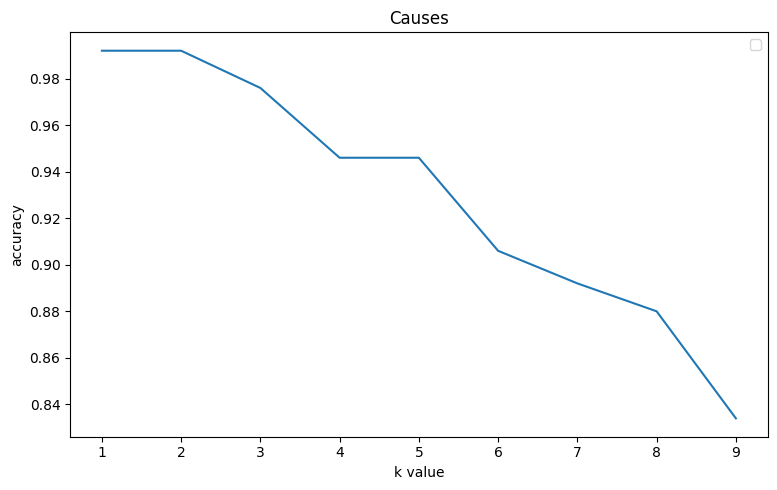

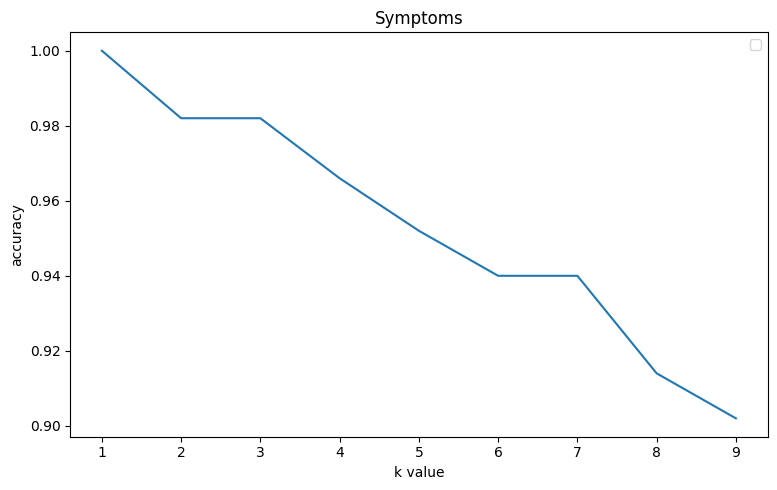

In [158]:
knn_c_accuracy = []
knn_s_accuracy = []

for k in range(1,10):
    kneighbors_c = KNeighborsClassifier(n_neighbors=k)
    kneighbors_s = KNeighborsClassifier(n_neighbors=k)
    
    kneighbors_c.fit(X_train_c, np.ravel(y_train_c))
    kneighbors_s.fit(X_train_s, np.ravel(y_train_s))
    
    y_pred_c = kneighbors_c.predict(X_test_c)
    y_pred_s = kneighbors_s.predict(X_test_s)
    
    knn_c_accuracy.append(accuracy_score(y_test_c, y_pred_c))
    knn_s_accuracy.append(accuracy_score(y_test_s, y_pred_s))

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,10), np.array(knn_c_accuracy))
plt.legend()
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('Causes')

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.plot(range(1,10), np.array(knn_s_accuracy))
plt.legend()
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('Symptoms')

In [160]:
kneighbors_c = KNeighborsClassifier(n_neighbors=3)
kneighbors_s = KNeighborsClassifier(n_neighbors=3)

After splitting the data into training and testing data, we can start building the models. However, before that, we want to figure out which model to use. In order to do that, we can incorporate a mean accuracy score and compare the values to each model. Since the data tended to overfit, we used a k-fold cross validation to ensure that the model does not overfit. A k-fold cross validation is a technique that divides the set into k groups or folds, and decreases overfitting. When doing this, we also want to find an ideal k using the elbow method. Thus, we can use a loop to add all of the mean accuracy scores from each model to an array and then graph the arrays to compare the k values and models to each other.

In [161]:
arrc1 = []
arrc2 = []
arrc3 = []

arrs1 = []
arrs2 = []
arrs3 = []
# Elbow Method testing to find k and compare different machine learning models
for k_folds in range(2, 30):
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

    cvc1 = cross_val_score(kneighbors_c, X_train_c, np.ravel(y_train_c), cv=skf)
    cvc2 = cross_val_score(randomforest_c, X_train_c, np.ravel(y_train_c), cv=skf)
    cvc3 = cross_val_score(decision_c, X_train_c, np.ravel(y_train_c), cv=skf)

    cvs1 = cross_val_score(kneighbors_c, X_train_s, np.ravel(y_train_s), cv=skf)
    cvs2 = cross_val_score(randomforest_c, X_train_s, np.ravel(y_train_s), cv=skf)
    cvs3 = cross_val_score(decision_c, X_train_s, np.ravel(y_train_s), cv=skf)

    arrc1.append(cvc1.mean())
    arrc2.append(cvc2.mean())
    arrc3.append(cvc3.mean())

    arrs1.append(cvs1.mean())
    arrs2.append(cvs2.mean())
    arrs3.append(cvs3.mean())

We can now produce graphs using matplotlib to look at how the different k values affect the models. The graph will also give us an idea of whether or not the models are overfitting, underfitting, or are balanced. If the line is straight and at a y=1, then we know that the model is overfitting. If the model has a very low mean accuracy score than we can assume that the model is underfitting. Ideally, the line should move betwen 0.9 and 0.98. A mean accuracy score of 0.98 means that the model has enough generalization to provide accuracte predictions without overfitting. A mean accuracy score above 0.9 means the same thing, but will be slightly less accurate. Furthermore, it is important not to overfit or underfit the model since the predictions will not be accurate or use too much or too little generalization when taking prediction values.

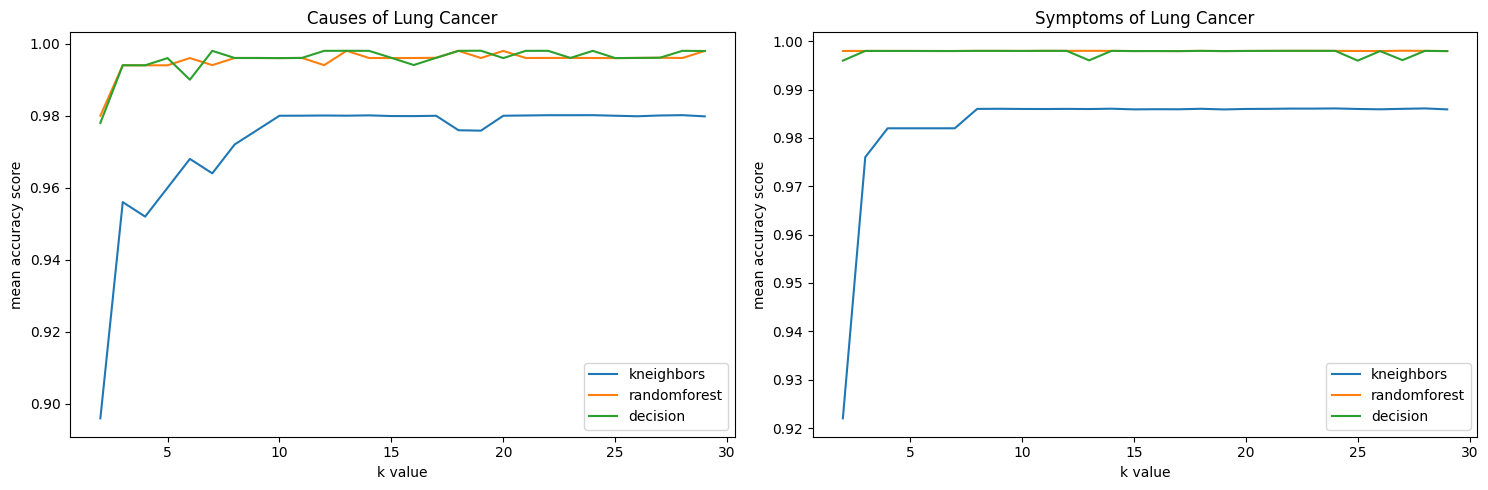

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(range(2,30), np.array(arrc1), label='kneighbors')
plt.plot(range(2,30), np.array(arrc2), label='randomforest')
plt.plot(range(2,30), np.array(arrc3), label='decision')
plt.legend()
plt.xlabel('k value')
plt.ylabel('mean accuracy score')
plt.title('Causes of Lung Cancer')

plt.subplot(1, 2, 2)
plt.plot(range(2,30), np.array(arrs1), label='kneighbors')
plt.plot(range(2,30), np.array(arrs2), label='randomforest')
plt.plot(range(2,30), np.array(arrs3), label='decision')
plt.legend()
plt.xlabel('k value')
plt.ylabel('mean accuracy score')
plt.title('Symptoms of Lung Cancer')

plt.show()

In [163]:
randomforest_c.fit(X_train_c, np.ravel(y_train_c))
kneighbors_c.fit(X_train_c, np.ravel(y_train_c))
decision_c.fit(X_train_c, np.ravel(y_train_c))
y_predc = []
y_predc.append(randomforest_c.predict(X_test_c))
y_predc.append(kneighbors_c.predict(X_test_c))
y_predc.append(decision_c.predict(X_test_c))

for i in y_predc:
    print(f'Accuracy: {accuracy_score(y_test_c, i)}')
    print(classification_report(y_test_c, i))

Accuracy: 0.998
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       147
           2       0.99      1.00      1.00       173
           3       1.00      1.00      1.00       180

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy: 0.976
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       147
           2       0.99      0.94      0.96       173
           3       0.95      1.00      0.98       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

Accuracy: 0.992
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       147
           2       0.99      0.98      0.99       173
           3       1.00    

In [164]:
randomforest_s.fit(X_train_s, np.ravel(y_train_s))
kneighbors_s.fit(X_train_s, np.ravel(y_train_s))
decision_s.fit(X_train_s, np.ravel(y_train_s))
y_preds = []
y_preds.append(randomforest_s.predict(X_test_s))
y_preds.append(kneighbors_s.predict(X_test_s))
y_preds.append(decision_s.predict(X_test_s))

for i in y_preds:
    print(f'Accuracy: {accuracy_score(y_test_s, i)}')
    print(classification_report(y_test_s, i))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       173
           3       1.00      1.00      1.00       180

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy: 0.982
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       147
           2       1.00      0.95      0.97       173
           3       1.00      1.00      1.00       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       173
           3       1.00      1.

After comparing the different accuracy scores, we can see that the Random Forest and Decision Tree models are overfitting the data since the score is very high. For the cause features, both of them had an accuracy of 0.998 and 1.0 for the symptoms features. Based on this, we would not want to use either of them since the model would not have enough generalizations to provide good predictions. The K Neighbors model had accuracy scores of 0.946 and 0.952 which mean that it has high accuracy, but also good generalization. Furthermore, since we want to predict the severity of lung cancer, it is important to look at the recall value. Recall signifies a measure of how many positives the model is able to recall and is important since we would not want to give someone a higher prediction than what the true value should be. However, since we are dealing with cancer, we would also want to consider precision since we would want to provide correct predictions most of the time. Due to this, we can look at the f1-score since it is a balance between precision and recall. From looking at the classification reports, we can see that the K Neighbors model also has high f1-scores which means that there is a good balance between precision and recall. Therefore, we would want to use the K Neighbors model to conduct our predictions.

__Predcictions Based on Causes__

In [172]:
''' 
[Age, 
Gender(0,1), 
Air Pollution(1-8), 
Occupational Hazard(1-8), 
Genetic Risk(1-7), 
Chronic Lung Disease(1-7), 
Smoking(1-8), 
Second hand smoking(1-8)]
'''
print(kneighbors_c.predict([[20, 0, 1, 1, 1, 1, 1, 1]])[0])
print(randomforest_c.predict([[20, 0, 1, 1, 1, 1, 1, 1]])[0])

2
1


In [173]:
'''
 [Age, 
 Gender(0,1), 
 Chest Pain(1-9), 
 Coughing of Blood(1-9), 
 Fatigue(1-9), 
 Weight Loss(1-8), 
 Shortness of Breath(1-9), 
 Wheezing(1-8), 
 Swalling Difficulty(1-8), 
 Dry Cough(1-7)]
 '''
print(kneighbors_s.predict([[20, 0, 1, 1, 1, 1, 1, 1, 1, 1]])[0])

1


Scholarly Articles mentioned above: https://www.mdpi.com/2227-9059/11/2/448, https://www.mayoclinic.org/diseases-conditions/copd/symptoms-causes/syc-20353679